In [12]:
using Pkg
#Pkg.add("Plots")
#Pkg.add("FastGaussQuadrature")
#Pkg.add("PyPlot")
using Plots

In [2]:
include("../src/SpecHeatReduction.jl")
using .SpecHeatReduction

In [3]:
ts = exp10.(-2.0:0.21/5:0.0)
n = 20
h = 1e-4

RAs = similar(ts)
RBs = similar(ts)
RCs = similar(ts)

for i in eachindex(ts)
    RAs[i] = RA(ts[i], n)
    RBs[i] = RB(ts[i], n, h)
    RCs[i] = RC(ts[i], n, h)
end

In [14]:
pyplot()

Plots.PyPlotBackend()

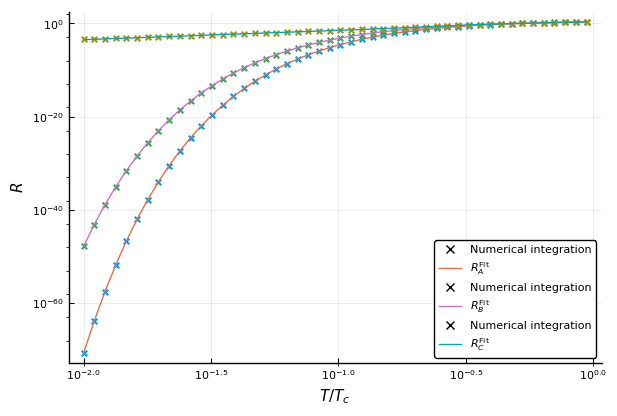

In [21]:
scatter(ts, RAs, xscale=:log10, yscale=:log10, label="Numerical integration", m=(4, :x))
plot!(ts, RA_fit.(vA.(ts)), xscale=:log10, yscale=:log10, label="\$R_A^{\\mathrm{Fit}}\$")
scatter!(ts, RBs, xscale=:log10, yscale=:log10, m=(4, :x), label="Numerical integration")
plot!(ts, RB_fit.(vB.(ts)), xscale=:log10, yscale=:log10, label="\$R_B^{\\mathrm{Fit}}\$")
scatter!(ts, RCs, xscale=:log10, yscale=:log10, m=(4, :x), label="Numerical integration")
plot!(ts, RC_fit.(vC.(ts)), xscale=:log10, yscale=:log10, label="\$R_C^{\\mathrm{Fit}}\$", legend=:bottomright)
xlabel!("\$T/T_c\$")
ylabel!("\$R\$")
#savefig("R_specific_heat_log.pdf")

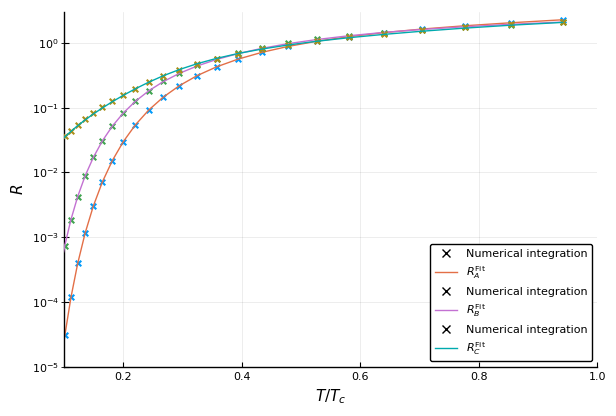

In [22]:
scatter(ts, RAs, yscale=:log10, label="Numerical integration", m=(4, :x))
plot!(ts, RA_fit.(vA.(ts)), yscale=:log10, label="\$R_A^{\\mathrm{Fit}}\$")
scatter!(ts, RBs, yscale=:log10, m=(4, :x), label="Numerical integration")
plot!(ts, RB_fit.(vB.(ts)), yscale=:log10, label="\$R_B^{\\mathrm{Fit}}\$")
scatter!(ts, RCs, yscale=:log10, m=(4, :x), label="Numerical integration")
plot!(ts, RC_fit.(vC.(ts)), yscale=:log10, label="\$R_C^{\\mathrm{Fit}}\$", legend=:bottomright)
xlims!(0.1,1)
ylims!(1e-5,3)
xlabel!("\$T/T_c\$")
ylabel!("\$R\$")
#savefig("R_specific_heat_linear.pdf")